ValueError: Cannot convert non-finite values (NA or inf) to integer

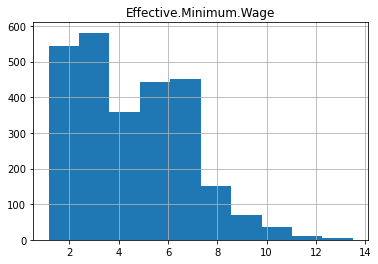

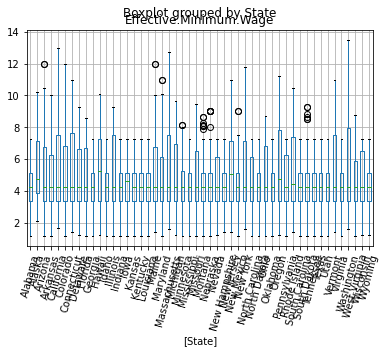

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May 30 16:13:39 2021

@author: nyssacornelius
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import plotly

clean_national_data = pd.read_pickle(".\\Cleaned\\clean_national_data.pkl")
clean_state_data = pd.read_pickle(".\\Cleaned\\clean_state_data.pkl")
work_stop = pd.read_pickle(".\\PrelimEDA\\work_stop.pkl")
minwagestate = pd.read_csv("/Users/nyssacornelius/Desktop/COMP4477/FProj/FProj/min_wage_state.csv", usecols=["Year","State","Effective.Minimum.Wage","Effective.Minimum.Wage.2020.Dollars","CPI.Average"])

minwagestate = minwagestate[(minwagestate['State']!= 'District of Columbia') &\
                          (minwagestate['State']!= 'U.S. Virgin Islands') &\
                              (minwagestate['State']!= 'Country Of Mexico') &\
                                  (minwagestate['State']!= 'Puerto Rico') &\
                                  (minwagestate['State']!= 'Guam')]

#do industries with the lowest wages have the more work stoppages?
#do states with the lowest minimum wages have more work stoppages?

minwagestate['State'] = minwagestate['State'].astype('string')

# hist(minwagestate)
# mwgrouped = minwagestate.groupby(['Year', 'State'])
# mwgrouped = mwgrouped.reset_index()

# mwgrouped.boxplot()
minwagestate.hist(column='Effective.Minimum.Wage')

# minwagestate.boxplot(column='Effective.Minimum.Wage', by = ["Year","State"])
minwagestate.boxplot(column='Effective.Minimum.Wage', by = ["State"], rot = 75)

work_stop = work_stop.rename(columns={'Days idle, cumulative for this work stoppage[3]': 'TotalDaysIdle'})

#Remove the weird [4] and make the column an integer data type
work_stop = work_stop.replace('[4]', np.NaN)
work_stop['TotalDaysIdle'] = work_stop['TotalDaysIdle'].astype('int32')

#TOMORROW TO-DO:
    ##CONFIGURE(?) GIT LFS BECAUSE APPARENTLY THESE FILES ARE TOO FREAKING BIG...UGH
#1) make histogram of work stop
#2) MORE EDA OF TIME SERIES
#3) Make choropleth of states work stoppage and minimum wage - will need to do in plotly and dash
#4) Can try to do jupyter-dash because prof wants it all in notebook form